___
# Ciência dos Dados - PROJETO 1

## Luca Salimon Nascimento

## Análise de dados de internet e tv em regiões do Brasil em 2013


___
## Introdução

Analisei os dados de 2013 para comparar o acesso à internet e acesso à internet através da televisão nas regiões do Brasil em 2013, e descobri a porcentagem de Tvs finas que existem nas casas nas diferentes regiões.


___
## Análise e Resultados

In [58]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [59]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Luca\Insper\2° semestre\Ciencia dos dados\CD_2017_2_Luca_Nascimento\Projeto 1\Projeto1


In [60]:
#Se usar o arquivo descompactado
dados = pd.read_csv('DOM2013.csv',sep=',')
#dados
#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [61]:
dadosfinais = pd.DataFrame({"tv_fina_em_casa":dados['V02270'],
                           "tv_por_assinatura":dados['V02272'],
                          'internet': dados['V02322'],
                         "acesso_internet_pela_tv": dados['V02326'],
                           'domicilio': dados['V0201'],
                           'regiao': dados['UF']})
#dadosfinais

In [62]:
#dadosfinais["acesso a internet pela tv"] =  dadosfinais["acesso a internet pela tv"].astype('category')
#dadosfinais["acesso a internet pela tv"].cat.categories = (["Sim", "Não"])
dadosfinais.acesso_internet_pela_tv = dadosfinais.acesso_internet_pela_tv.astype('category')
dadosfinais.acesso_internet_pela_tv.cat.categories = (['Sim','Não'])
dadosfinais.internet = dadosfinais.internet.astype('category')
dadosfinais.internet.cat.categories = (['Sim','Não'])
dadosfinais.domicilio = dadosfinais.domicilio.astype('category')
dadosfinais.domicilio.cat.categories = (['particular permanente','particular improvisado', 'coletivo'])
dadosfinais.tv_por_assinatura = dadosfinais.tv_por_assinatura.astype('category')
dadosfinais.tv_por_assinatura.cat.categories = (['Sim','Não'])

#dadosfinais

In [63]:
dadosfinais = dadosfinais[(dadosfinais.domicilio == 'particular permanente')]
#dadosfinais

In [64]:
dadosfinais = dadosfinais[pd.notnull(dadosfinais.domicilio) &\
                          pd.notnull(dadosfinais.internet) &\
                          pd.notnull(dadosfinais.acesso_internet_pela_tv) &\
                          pd.notnull(dadosfinais.tv_fina_em_casa) &\
                          pd.notnull(dadosfinais.tv_por_assinatura)]
#dadosfinais

In [65]:
dadosnorte = dadosfinais[(dadosfinais.regiao == 11.0) | (dadosfinais.regiao == 12.0) | (dadosfinais.regiao == 13.0) | (dadosfinais.regiao == 14.0) | (dadosfinais.regiao == 15.0) | (dadosfinais.regiao == 16.0) | (dadosfinais.regiao == 17.0) ]
#dadosnorte

In [66]:
dadossulsudeste = dadosfinais[(dadosfinais.regiao == 31.0) | (dadosfinais.regiao == 32.0) | (dadosfinais.regiao == 33.0) | (dadosfinais.regiao == 35.0) | (dadosfinais.regiao == 41.0) | (dadosfinais.regiao == 42.0) | (dadosfinais.regiao == 43.0)]
#dadossulsudeste

In [67]:
dados_centro_oeste = dadosfinais[(dadosfinais.regiao == 50.0) | (dadosfinais.regiao == 51.0) | (dadosfinais.regiao == 52.0) | (dadosfinais.regiao == 53.0)]
#dados_centro_oeste

In [68]:
dados_nordeste = dadosfinais[(dadosfinais.regiao == 21.0) | (dadosfinais.regiao == 22.0) | (dadosfinais.regiao == 23.0) | (dadosfinais.regiao == 24.0) | (dadosfinais.regiao == 25.0) | (dadosfinais.regiao == 26.0) | (dadosfinais.regiao == 27.0) | (dadosfinais.regiao == 28.0) | (dadosfinais.regiao == 29.0)]
#dados_nordeste

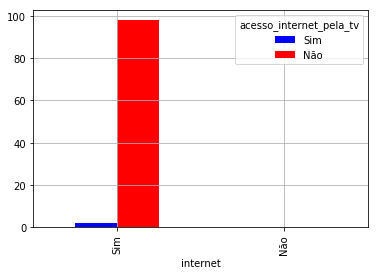

In [69]:
#Mostra quem tem acesso à internet através da Tv dos que tem acesso à internet em casa na região Nordeste na forma de Gráfico
nt = pd.crosstab(dados_nordeste.internet, dados_nordeste.acesso_internet_pela_tv, normalize = True)*100
grant = nt.plot(kind='bar', color =('blue', 'red','black','green'), legend=True)
grant.grid(True)

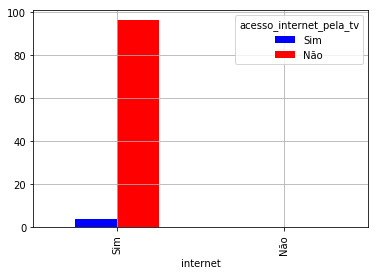

In [70]:
#Mostra quem tem acesso à internet através da Tv dos que tem acesso à internet em casa na região Centro Oeste na forma de gráfico
gt = pd.crosstab(dados_centro_oeste.internet, dados_centro_oeste.acesso_internet_pela_tv, normalize = True)*100
grag = gt.plot(kind='bar', color =('blue', 'red','black','green'), legend=True)
grag.grid(True)

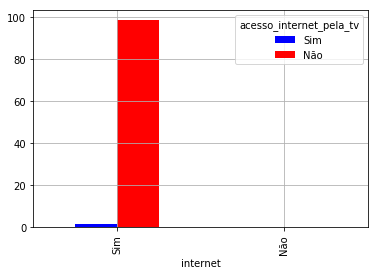

In [71]:
#Mostra quem tem acesso à internet através da Tv dos que tem acesso à internet em casa na região Norte na forma de gráfico
ct = pd.crosstab(dadosnorte.internet, dadosnorte.acesso_internet_pela_tv, normalize = True)*100
gra = ct.plot(kind='bar', color =('blue', 'red','black','green'), legend=True)
gra.grid(True)

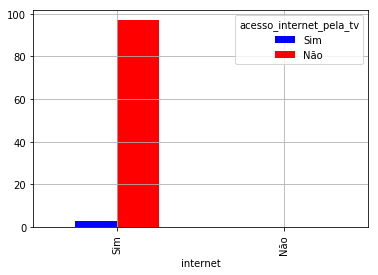

In [72]:
#Mostra quem tem acesso à internet através da Tv dos que tem acesso à internet em casa na região Sul-Sudeste na forma de gráfico
at = pd.crosstab(dadossulsudeste.internet, dadossulsudeste.acesso_internet_pela_tv, normalize = True)*100
graf = at.plot(kind='bar', color =('blue', 'red','black','green'), legend=True)
graf.grid(True)

In [73]:
#Mostra quem tem acesso à internet através da Tv dos que tem acesso à internet em casa na região Norte
ct

acesso_internet_pela_tv,Sim,Não
internet,,
Sim,1.491117,98.508883
Não,0.000000,0.000000


In [74]:
#Mostra quem tem acesso à internet através da Tv dos que tem acesso à internet em casa na região Nordeste
nt

acesso_internet_pela_tv,Sim,Não
internet,,
Sim,1.983891,98.016109
Não,0.000000,0.000000


In [75]:
#Mostra quem tem acesso à internet através da Tv dos que tem acesso à internet em casa na região Sul-Sudeste
at

acesso_internet_pela_tv,Sim,Não
internet,,
Sim,3.018818,96.981182
Não,0.000000,0.000000


In [76]:
#Mostra quem tem acesso à internet através da Tv dos que tem acesso à internet em casa na região Norte
gt

acesso_internet_pela_tv,Sim,Não
internet,,
Sim,3.901338,96.098662
Não,0.000000,0.000000


In [77]:
#Porcentagem do número de Tvs finas na casa da região Norte
tv_norte = pd.crosstab(dadosnorte.internet, dadosnorte.tv_fina_em_casa, normalize = True)*100
tv_norte

tv_fina_em_casa,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,9.0
internet,,,,,,,,,
Sim,43.099619,38.118655,13.356599,3.902284,1.07868,0.317259,0.063452,0.047589,0.015863
Não,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


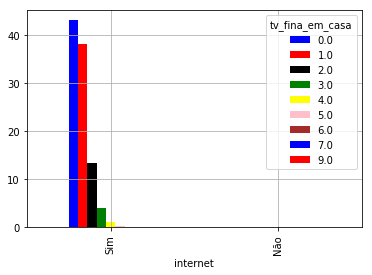

In [78]:
#Porcentagem do número de Tvs finas na casa da região Norte na forma de um gráfico
tv_norteg = tv_norte.plot(kind='bar', color =('blue', 'red','black','green', 'yellow', 'pink', 'brown'), legend=True)
tv_norteg.grid(True)

In [79]:
#Porcentagem do número de Tvs finas na casa da região Sul-Sudeste
tv_sul_sudeste = pd.crosstab(dadossulsudeste.internet, dadossulsudeste.tv_fina_em_casa, normalize = True)*100
tv_sul_sudeste

tv_fina_em_casa,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
internet,,,,,,,,,,
Sim,32.521504,43.008272,17.298883,5.467488,1.206209,0.385591,0.085687,0.016478,0.006591,0.003296
Não,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


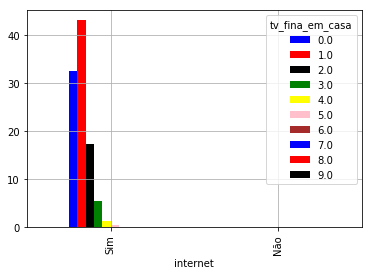

In [80]:
#Porcentagem do número de Tvs finas na casa da região Sul-Sudeste na forma de gráfico
tv_sul_sudeste_g = tv_sul_sudeste.plot(kind='bar', color =('blue', 'red','black','green', 'yellow', 'pink', 'brown'), legend=True)
tv_sul_sudeste_g.grid(True)

In [81]:
#Porcentagem das residencias que tem um certo numero de tvs finas em casa na regiao Centro Oeste 
tv_centro_oeste = pd.crosstab(dados_centro_oeste.internet,dados_centro_oeste.tv_fina_em_casa, normalize =True)*100
tv_centro_oeste

tv_fina_em_casa,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
internet,,,,,,,,
Sim,35.192649,43.075931,14.6542,4.900854,1.628244,0.38691,0.12897,0.032242
Não,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.00000,0.000000


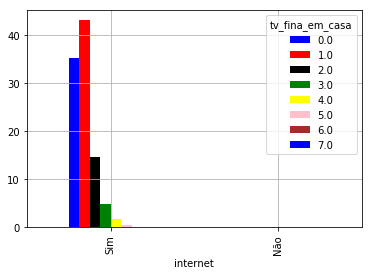

In [82]:
#Porcentagem das residencias que tem um certo numero de tvs finas em casa na regiao Centro Oeste em forma de grafico
tv_centro_oeste_g = tv_centro_oeste.plot(kind='bar', color =('blue', 'red','black','green', 'yellow', 'pink', 'brown'), legend = True)
tv_centro_oeste_g.grid(True)

In [83]:
#Porcentagem das residencias que tem um certo numero de tvs finas em casa na regiao nordeste 
tv_nordeste = pd.crosstab(dados_nordeste.internet,dados_nordeste.tv_fina_em_casa, normalize =True)*100
tv_nordeste

tv_fina_em_casa,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
internet,,,,,,,,,
Sim,39.228487,41.907588,13.073336,4.230606,1.127596,0.305214,0.084782,0.033913,0.008478
Não,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


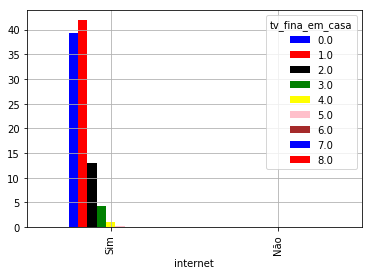

In [84]:
#Porcentagem das residencias que tem um certo numero de tvs finas em casa na regiao nordeste em forma de grafico
tv_nordeste_g = tv_nordeste.plot(kind='bar', color =('blue', 'red','black','green', 'yellow', 'pink', 'brown'), legend = True)
tv_nordeste_g.grid(True)

In [90]:
tvs = dadosfinais[dadosfinais.tv_fina_em_casa < 6.0]

In [91]:
#len(tvs)

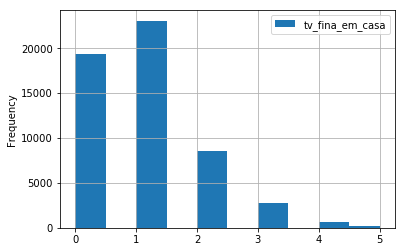

In [94]:
tv_hist = tvs.tv_fina_em_casa.plot(kind='hist', legend =True)
tv_hist.grid(True)

___
## Conclusão 

Descreva aqui suas conclusões!

In [89]:
print("De todas as regiões do Brasil, a única na qual a maioria das casas que possuem internet não tem nenhuma Tv fina é a região Norte, o que é surpreendente, pois grande parte da população acredita que a região Nordeste esteja numa situação pior do que a norte, o que no caso das Tvs não se aplica.")
print('Outra surpresa é que a região que tem a maior porcentagem de casas que tem acesso à internet através da tv é justamente a região Norte, seguida pela região Sul-Sudeste')

De todas as regiões do Brasil, a única na qual a maioria das casas que possuem internet não tem nenhuma Tv fina é a região Norte, o que é surpreendente, pois grande parte da população acredita que a região Nordeste esteja numa situação pior do que a norte, o que no caso das Tvs não se aplica.
Outra surpresa é que a região que tem a maior porcentagem de casas que tem acesso à internet através da tv é justamente a região Norte, seguida pela região Sul-Sudeste
